# Extracting General Statistics about a Research Organization

This Notebook shows how it's possible to extract basic indicators about a Fraunhofer organization programmatically, using the Dimensions API and Jupyter Notebooks. 


## Load libraries and log in

In [2]:
username = ""  #@param {type: "string"}
password = ""  #@param {type: "string"}
endpoint = "https://app.dimensions.ai"  #@param {type: "string"}

#
!pip install dimcli plotly_express -U --quiet 
#
# API library
import dimcli
from dimcli.shortcuts import *
dimcli.login(username, password, endpoint)
dsl = dimcli.Dsl()
#
# other libraries
import plotly_express as px
import pandas as pd
from pandas.io.json import json_normalize
import time
import json
from tqdm import tqdm_notebook as pbar


DimCli v0.6.1 - Succesfully connected to <https://app.dimensions.ai> (method: manual login)


## Choose a Fraunhofer Research Organization

Dimensions uses GRID to identify research-related organizations, eg https://grid.ac/institutes/grid.89170.37 

In [3]:
#@markdown Please choose a specific member of the Fraunhofer Society,  then run this cell.

GRIDID = "grid.461628.f"  #@param ['Fraunhofer Institute for Laser Technology == grid.461628.f', 'Fraunhofer Institute for Molecular Biology and Applied Ecology == grid.418010.c', 'Fraunhofer Institute for Production Technology == grid.461634.2', 'Fraunhofer Research Institution for Casting, Composite and Processing Technology == grid.506241.4', 'Fraunhofer Institute for Telecommunications, Heinrich Hertz Institute == grid.435231.2', 'Fraunhofer Institute for Open Communication Systems == grid.469837.7', 'Fraunhofer Institute for Production Systems and Design Technology == grid.469819.b', 'Fraunhofer Institute for Reliability and Microintegration == grid.469839.9', 'Fraunhofer Institute for Wood Research Wilhelm-Klauditz-Institut == grid.469829.8', 'Fraunhofer Institute for Surface Engineering and Thin Films == grid.462227.7', 'Fraunhofer Institute for Digital Medicine == grid.428590.2', 'Fraunhofer Institute for Manufacturing Technology and Advanced Materials == grid.461617.3', 'Fraunhofer Institute for Wind Energy Systems == grid.8440.8', 'Fraunhofer Institute for Electronic Nano Systems == grid.469847.0', 'Fraunhofer Institute for Machine Tools and Forming Technology == grid.461651.1', 'Fraunhofer Institute for Structural Durability and System Reliability == grid.434481.e', 'Fraunhofer Institute for Computer Graphics Research == grid.461618.c', 'Fraunhofer Institute for Secure Information Technology == grid.469848.f', 'Fraunhofer Institute for Material Flow and Logistics == grid.469827.6', 'Fraunhofer Institute for Software and Systems Engineering == grid.469821.0', 'Fraunhofer Institute for Ceramic Technologies and Systems == grid.461622.5', 'Fraunhofer Institute for Organic Electronics, Electron Beam and Plasma Technology == grid.469851.7', 'Fraunhofer Institute for Photonic Microsystems == grid.469853.5', 'Fraunhofer Institute for Transportation and Infrastructure Systems == grid.469826.7', 'Fraunhofer Institute for Material and Beam Technology == grid.461641.0', 'Fraunhofer Institute for Microelectronic Circuits and Systems == grid.469854.2', 'Fraunhofer Institute for Integrated Circuits == grid.469850.6', 'Fraunhofer Institute for Integrated Circuits == grid.469823.2', 'Fraunhofer Institute for Integrated Systems and Device Technology == grid.469855.3', 'Fraunhofer Institute of Optronics, System Technologies and Image Exploitation == grid.466706.5', 'Fraunhofer Institute for Technological Trend Analysis == grid.469856.0', 'Fraunhofer Institute for Applied Solid State Physics == grid.424642.2', 'Fraunhofer Institute for High-Speed Dynamics, Ernst-Mach-Institut == grid.461627.0', 'Fraunhofer Institute for Physical Measurement Techniques == grid.461631.7', 'Fraunhofer Institute for Solar Energy Systems == grid.434479.9', 'Fraunhofer Institute for Mechanics of Materials == grid.461645.4', 'Fraunhofer Institute for Process Engineering and Packaging == grid.466709.a', 'Fraunhofer Institute for Microstructure of Materials and Systems == grid.469857.1', 'Fraunhofer Research Institution for Additive Manufacturing Technologies == grid.506239.b', 'Fraunhofer Institute for Toxicology and Experimental Medicine == grid.418009.4', 'Fraunhofer Institute for Ceramic Technologies and Systems == grid.461622.5', 'Fraunhofer Institute for Building Physics == grid.469871.5', 'Fraunhofer Institute for Digital Media Technology  == grid.469861.4', 'Fraunhofer Institute for Silicon Technology == grid.469817.5', 'Fraunhofer Institute for Applied Optics and Precision Engineering == grid.418007.a', 'Fraunhofer Institute for Experimental Software Engineering == grid.469863.6', 'Fraunhofer Institute for Industrial Mathematics == grid.461635.3', 'Fraunhofer Institute of Optronics, System Technologies and Image Exploitation == grid.466706.5', 'Fraunhofer Institute for Systems and Innovation Research == grid.459551.9', 'Fraunhofer Institute for Energy Economics and Energy System Technology == grid.506250.4', 'Fraunhofer Center for International Management and Knowledge Economy == grid.462230.1', 'Fraunhofer Institute for Cell Therapy and Immunology == grid.418008.5', 'Fraunhofer Research Institution for Marine Biotechnology and Cell Technology == grid.469834.4', 'Fraunhofer Institute for Factory Operation and Automation == grid.469818.a', 'Fraunhofer Institute for Microengineering and Microsystems == grid.28894.3f', 'Fraunhofer Institute for Embedded Systems and Communication Technologies == grid.469865.0', 'Fraunhofer Research Institution for Microsystems and Solid State Technologies == grid.469866.3', 'Fraunhofer Institute for Applied and Integrated Security == grid.469867.2', 'Fraunhofer Institute for Environmental, Safety, and Energy Technology == grid.424428.c', 'Fraunhofer Institute for Mechatronic Systems Design == grid.469868.d', 'Fraunhofer Institute for Chemical Technology == grid.461616.2', 'Fraunhofer Institute for Applied Polymer Research == grid.461615.1', 'Fraunhofer Research Institution for Large Structures in Production Engineering == grid.506226.5', 'Fraunhofer Institute for Nondestructive Testing == grid.469830.0', 'Fraunhofer Institute for Algorithms and Scientific Computing == grid.418688.b', 'Fraunhofer Institute for Applied Information Technology == grid.469870.4', 'Fraunhofer Institute for Intelligent Analysis and Information Systems == grid.469822.3', 'Fraunhofer Institute for Molecular Biology and Applied Ecology == grid.418010.c', 'Fraunhofer Institute for Industrial Engineering == grid.434477.7', 'Fraunhofer Institute for Building Physics == grid.469871.5', 'Fraunhofer Institute for Interfacial Engineering and Biotechnology == grid.469831.1', 'Fraunhofer Institute for Manufacturing Engineering and Automation == grid.469833.3', 'Fraunhofer Information Center for Planning and Building == grid.469872.6', 'Fraunhofer Institute for Biomedical Engineering == grid.452493.d', 'Fraunhofer Institute for High Frequency Physics and Radar Techniques == grid.461619.d', 'Fraunhofer Institute for Communication, Information Processing and Ergonomics == grid.469836.6', 'Fraunhofer Institute for Silicate Research == grid.424644.4']
    
#@markdown The start/end year of publications used to extract patents
YEAR_START = 2000 #@param {type: "slider", min: 1950, max: 2020}
YEAR_END = 2016 #@param {type: "slider", min: 1950, max: 2020}

if YEAR_END < YEAR_START:
  YEAR_END = YEAR_START

try:
    if "==" in GRIDID: GRIDID = GRIDID.split("==")[1].strip() 
    print("Selection: ", GRIDID)
except:
    print("Please select an organization")
    raise


#
# gen link to Dimensions
#

def dimensions_url(grids):
    root = "https://app.dimensions.ai/discover/publication?or_facet_research_org="
    return root + "&or_facet_research_org=".join([x for x in grids])

from IPython.core.display import display, HTML
display(HTML('---<br /><a href="{}">Open {} in Dimensions &#x29c9;</a>'.format(dimensions_url([GRIDID]), GRIDID)))


#@markdown ---

Selection:  grid.461628.f


# 1. Publications

## Publications output by year 

In [4]:
dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications""").stats 

Returned Publications: 20 (total = 1079)


{'total_count': 1079}

Returned Year: 55


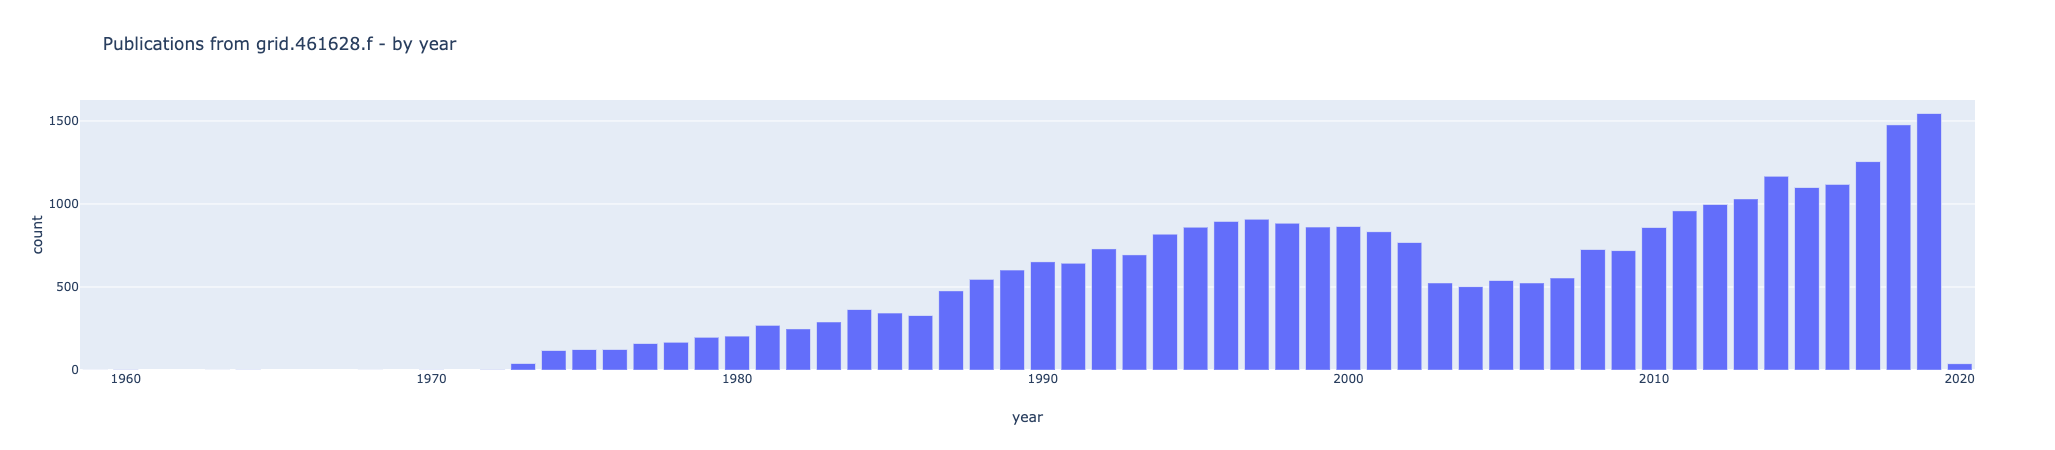

In [18]:
df = dslquery("""search publications where research_orgs.id="grid.6906.9" return year limit 100""").as_dataframe() 
df.rename(columns={"id": "year"}, inplace=True)
#
px.bar(df, x="year", y="count", 
       title=f"Publications from {GRIDID} - by year")

## Publications most cited in last 2 years

In [8]:
data = dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications[doi+title+recent_citations+category_for+journal] sort by recent_citations""")
df = json_normalize(data.publications)
df.head(10)[['title', 'doi', 'recent_citations', 'journal.title']]

Returned Publications: 20 (total = 1079)


,title,doi,recent_citations,journal.title
0,Additive manufactured AlSi10Mg samples using S...,10.1016/j.matdes.2011.07.067,213,Materials & Design
1,High Power Selective Laser Melting (HP SLM) of...,10.1016/j.phpro.2011.03.035,112,Physics Procedia
2,"Laser-Induced Breakdown Spectroscopy, Fundamen...",10.1007/978-3-642-20668-9,105,NaN
3,Ductility of a Ti‐6Al‐4V alloy produced by sel...,10.1108/13552541011083371,82,Rapid Prototyping Journal
4,Hyperbolic phonon-polaritons in boron nitride ...,10.1038/ncomms8507,79,Nature Communications
5,Formation and reduction of hydrogen porosity d...,10.1016/j.jmatprotec.2015.02.013,78,Journal of Materials Processing Technology
6,Surface topography enhances differentiation of...,10.1016/j.biomaterials.2015.05.030,72,Biomaterials
7,Additive manufacturing of ZrO2‐Al2O3 ceramic c...,10.1108/13552541311292736,64,Rapid Prototyping Journal
8,"Structural, mechanical and in vitro characteri...",10.1016/j.biomaterials.2005.07.041,61,Biomaterials
9,Compact diode-pumped 1.1 kW Yb:YAG Innoslab fe...,10.1364/ol.35.004169,46,Optics Letters


## Publications most cited - all time

In [9]:
data = dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications[doi+title+times_cited+category_for+journal] sort by times_cited limit 1000""")
df = json_normalize(data.publications)
df.head(10)[['title', 'doi', 'times_cited', 'journal.title']]

Returned Publications: 1000 (total = 1079)


,title,doi,times_cited,journal.title
0,Additive manufactured AlSi10Mg samples using S...,10.1016/j.matdes.2011.07.067,417.0,Materials & Design
1,"Laser-Induced Breakdown Spectroscopy, Fundamen...",10.1007/978-3-642-20668-9,318.0,NaN
2,Laser-induced breakdown spectrometry — applica...,10.1016/s0584-8547(01)00214-2,265.0,Spectrochimica Acta Part B Atomic Spectroscopy
3,High Power Selective Laser Melting (HP SLM) of...,10.1016/j.phpro.2011.03.035,257.0,Physics Procedia
4,"Structural, mechanical and in vitro characteri...",10.1016/j.biomaterials.2005.07.041,256.0,Biomaterials
5,Compact diode-pumped 1.1 kW Yb:YAG Innoslab fe...,10.1364/ol.35.004169,245.0,Optics Letters
6,Ductility of a Ti‐6Al‐4V alloy produced by sel...,10.1108/13552541011083371,208.0,Rapid Prototyping Journal
7,Laser Machining by short and ultrashort pulses...,10.1016/s0007-8506(07)61699-0,196.0,CIRP Annals
8,Hyperbolic phonon-polaritons in boron nitride ...,10.1038/ncomms8507,145.0,Nature Communications
9,Laser-Induced Breakdown Spectroscopy for Polym...,10.1366/0003702981943680,138.0,Applied Spectroscopy


## Publications most cited : which research areas?

First we want to ensure all publications have a valid FOR code key. Also, we want to break them up cause each publication can have more than one. 
The FOR structure for a single publication is like this: `{'category_for' : [{'id': '3292', 'name': '1402 Applied Economics'}, {'id': '3177', 'name': '1117 Public Health and Health Services'}]}`

In [20]:
data = dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications[doi+title+times_cited+category_for+journal] sort by times_cited limit 1000""")
for x in data.publications:
    if not 'category_for' in x:
        x['category_for'] = ""
    else:
        x['category_for'] = [{'name' : x['name'][5:]} for x in x['category_for']] # also remove the digit prefix to improve legibility

Returned Publications: 1000 (total = 1079)


In [21]:
df = json_normalize(data.publications, record_path='category_for', meta=['doi', 'title', 'times_cited', ['journal', 'title']], errors='ignore' )
df.head()

,name,doi,title,times_cited,journal.title
0,Materials Engineering,10.1016/j.matdes.2011.07.067,Additive manufactured AlSi10Mg samples using S...,417,Materials & Design
1,gineering,10.1016/j.matdes.2011.07.067,Additive manufactured AlSi10Mg samples using S...,417,Materials & Design
2,emical Sciences,10.1016/s0584-8547(01)00214-2,Laser-induced breakdown spectrometry — applica...,265,Spectrochimica Acta Part B Atomic Spectroscopy
3,Analytical Chemistry,10.1016/s0584-8547(01)00214-2,Laser-induced breakdown spectrometry — applica...,265,Spectrochimica Acta Part B Atomic Spectroscopy
4,Materials Engineering,10.1016/j.phpro.2011.03.035,High Power Selective Laser Melting (HP SLM) of...,257,Physics Procedia


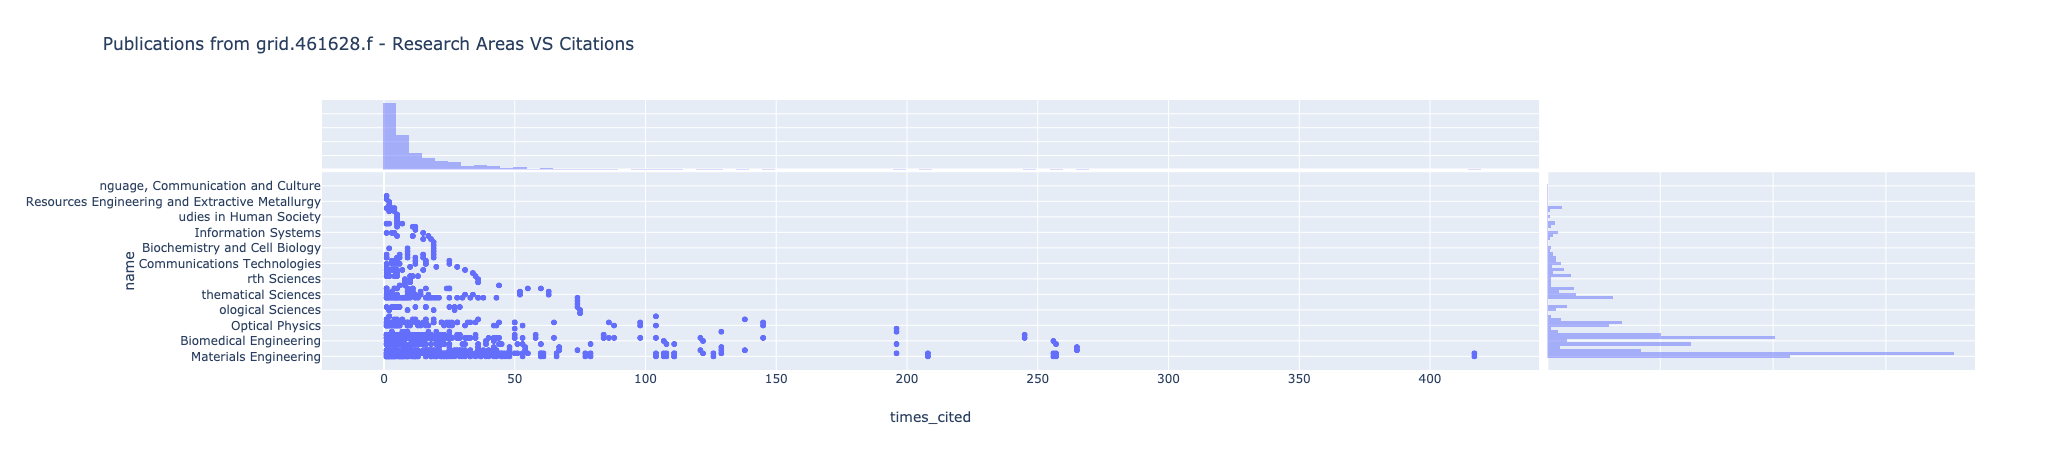

In [23]:
px.scatter(df, x="times_cited", y="name", 
           marginal_x="histogram", marginal_y="histogram", 
           title=f"Publications from {GRIDID} - Research Areas VS Citations")

## Publications most cited : which journals?

Returned Publications: 1000 (total = 1079)


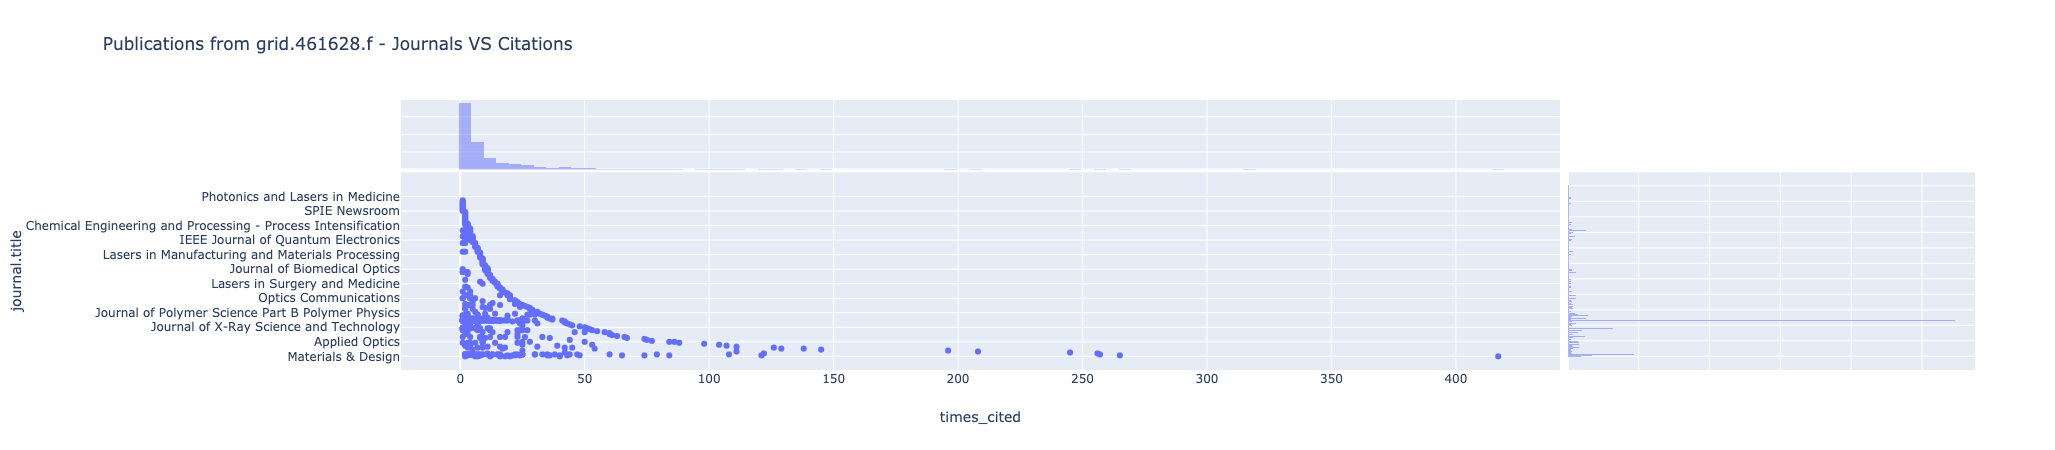

In [24]:
data2 = dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications[doi+title+times_cited+category_for+journal] sort by times_cited limit 1000""")
df2 = json_normalize(data2.publications)
#
px.scatter(df2, x="times_cited", y="journal.title", 
           marginal_x="histogram", marginal_y="histogram", 
           title=f"Publications from {GRIDID} - Journals VS Citations")

## Combining the previous two charts ...

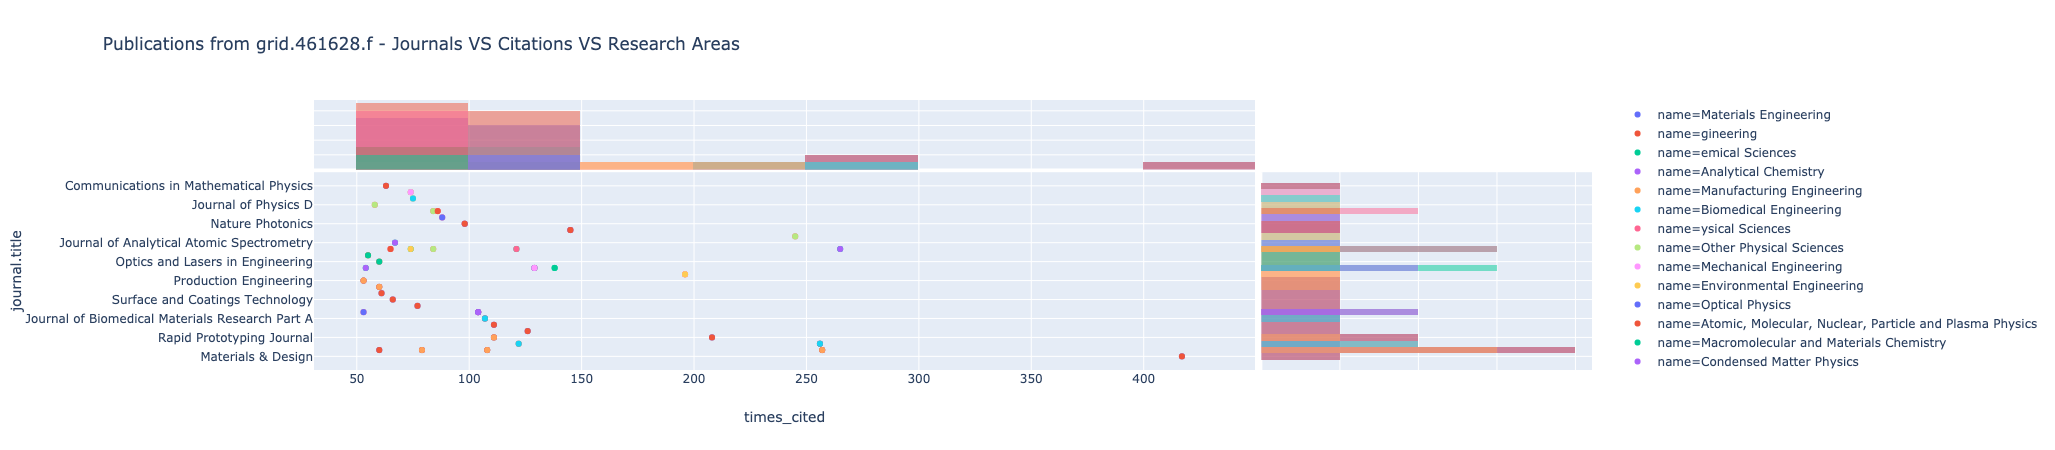

In [25]:
px.scatter(df.head(100), x="times_cited", y="journal.title", color="name", 
           marginal_x="histogram", marginal_y="histogram", 
           title=f"Publications from {GRIDID} - Journals VS Citations VS Research Areas ")

# 2. Funding

## Top Funders for Rotterdam (by aggregated funding amount)

In [28]:
fundersdata = dslquery(f"""search grants where research_orgs.id="{GRIDID}" return funders aggregate funding sort by funding""")
df = fundersdata.as_dataframe()
df.head(10)

Returned Funders: 4


,id,count,funding,acronym,name,country_name
0,grid.5586.e,197,126898901.0,BMBF,Federal Ministry of Education and Research,Germany
1,grid.424440.2,48,40178610.0,BMWi,Federal Ministry for Economic Affairs and Energy,Germany
2,grid.270680.b,1,0.0,EC,European Commission,Belgium
3,grid.424150.6,9,0.0,DFG,German Research Foundation,Germany


## Top funders split by country of the funder

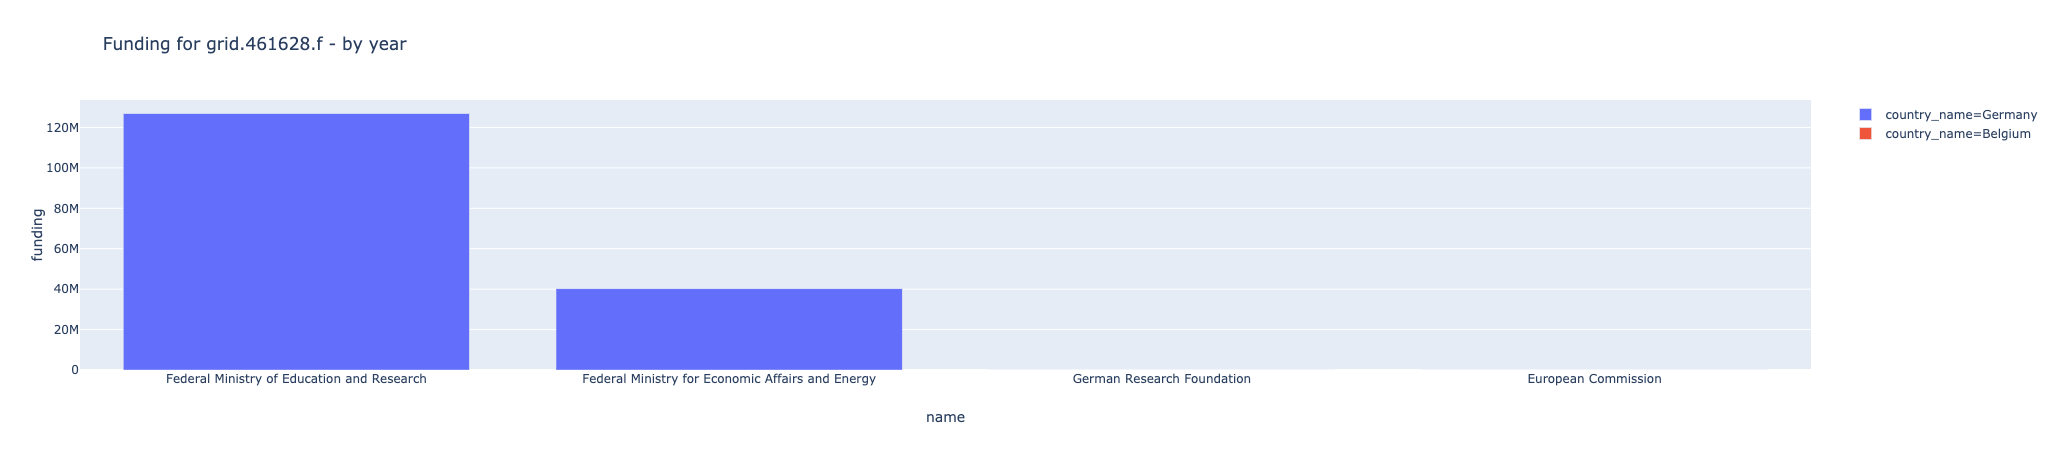

In [29]:
px.bar(df, x="name", y="funding", color="country_name",
       title=f"Funding for {GRIDID} - by year")

## Correlation between No of Publications VS Funding

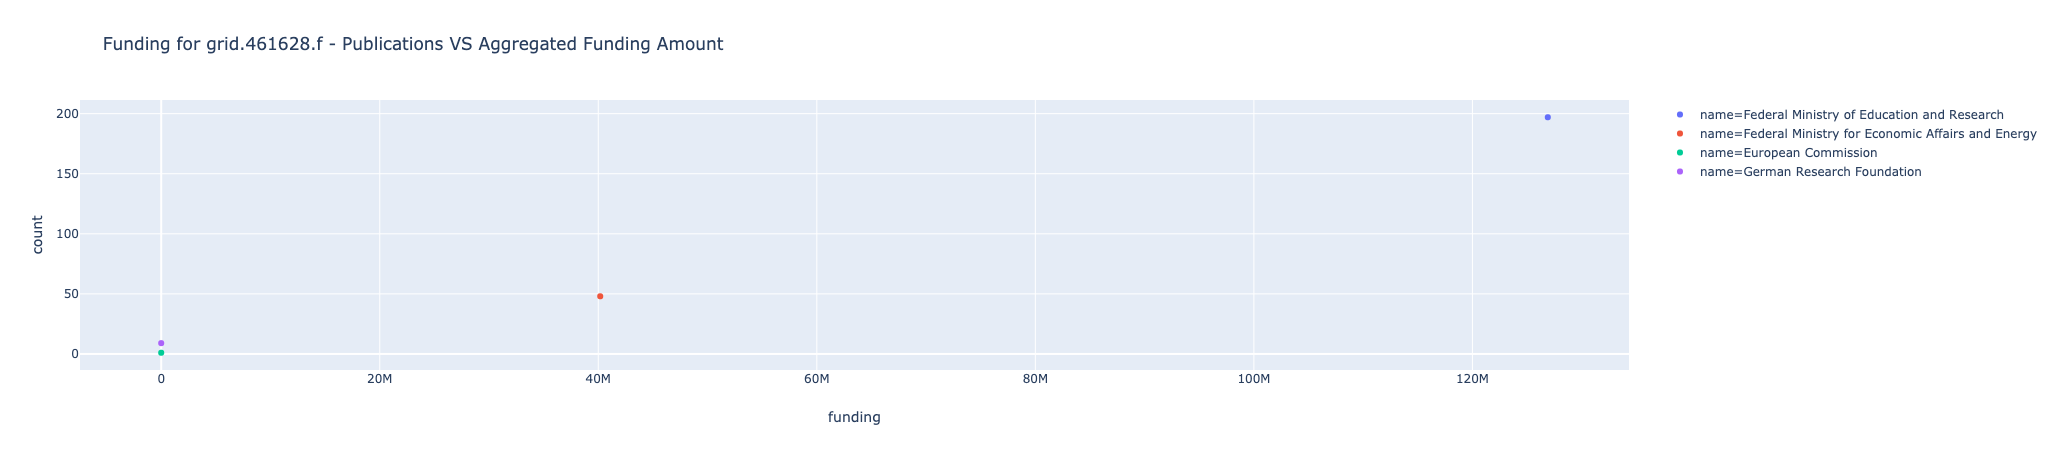

In [30]:
px.scatter(df, x="funding", y="count", color="name", 
           title=f"Funding for {GRIDID} - Publications VS Aggregated Funding Amount")

---
# Want to learn more?

Check out the [Dimensions API Lab](https://digital-science.github.io/dimensions-api-lab/) website, which contains many tutorials and reusable Jupyter notebooks for scholarly data analytics. 